In [6]:
from pathlib import Path
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

In [11]:
avg_weights = {}
for ckpt in tqdm(Path('../speech_hypertuning/experiments/experiment_lr').rglob('*.ckpt')):
    w = torch.load(ckpt, map_location='cpu')['state_dict']
    avg_weights[ckpt.parts[-3]] = torch.nn.functional.softmax(w['avg_weights']).detach().cpu().numpy()

0it [00:00, ?it/s]/tmp/ipykernel_307062/2986617923.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  avg_weights[ckpt.parts[-3]] = torch.nn.functional.softmax(w['avg_weights']).detach().cpu().numpy()
14it [00:01, 11.01it/s]


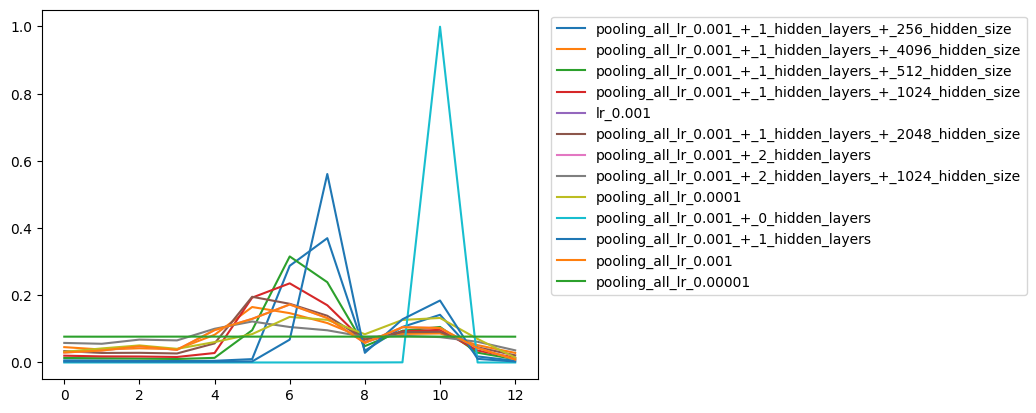

In [15]:
for k,v in avg_weights.items():
    plt.plot(v, label=k)
plt.legend(bbox_to_anchor=(1,0,1,1))